In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [5]:
company = pd.read_csv('/home/sushil/Desktop/Company_Data.csv')

In [6]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
company.shape

(400, 11)

In [14]:
company['Sales'].value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

In [15]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [16]:
np.median(company['Sales'])

7.49

In [17]:
data = company

In [18]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [19]:
def cal(i):
    
    if i >= 7.49:
        return 'High'
    else:
        return 'Low'

In [20]:
data['Sales']=data['Sales'].apply(cal)

In [22]:
data['Sales'].head()

0    High
1    High
2    High
3     Low
4     Low
Name: Sales, dtype: object

<AxesSubplot:xlabel='Sales', ylabel='count'>

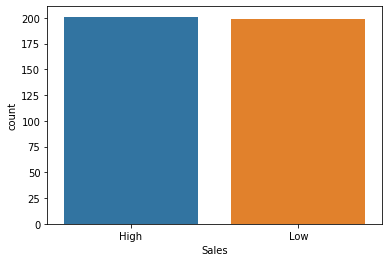

In [23]:
sns.countplot(data['Sales'])

In [24]:
data_new = pd.get_dummies(data[['ShelveLoc','Urban' , 'US']],drop_first = True)

In [25]:
data_new

,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,0,0,1,1
1,1,0,1,1
2,0,1,1,1
3,0,1,1,1
4,0,0,1,0
...,...,...,...,...
395,1,0,1,1
396,0,1,0,1
397,0,1,1,1
398,0,0,1,1


In [26]:
data_new = pd.concat([data.iloc[:,[0,1,2,3,4,5,6,7,8]],data_new],axis = 1)

In [27]:
data_new

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,High,138,73,11,276,120,Bad,42,17,0,0,1,1
1,High,111,48,16,260,83,Good,65,10,1,0,1,1
2,High,113,35,10,269,80,Medium,59,12,0,1,1,1
3,Low,117,100,4,466,97,Medium,55,14,0,1,1,1
4,Low,141,64,3,340,128,Bad,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,1,0,1,1
396,Low,139,23,3,37,120,Medium,55,11,0,1,0,1
397,Low,162,26,12,368,159,Medium,40,18,0,1,1,1
398,Low,100,79,7,284,95,Bad,50,12,0,0,1,1


In [28]:
data_new1 = data_new.drop('ShelveLoc',axis = 1)

In [30]:
data_new1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,High,138,73,11,276,120,42,17,0,0,1,1
1,High,111,48,16,260,83,65,10,1,0,1,1
2,High,113,35,10,269,80,59,12,0,1,1,1
3,Low,117,100,4,466,97,55,14,0,1,1,1
4,Low,141,64,3,340,128,38,13,0,0,1,0


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
from imblearn.over_sampling import SMOTE

In [36]:
x = data_new1.drop('Sales', axis = 1)

In [37]:
y = data_new1['Sales']

In [38]:
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0


In [39]:
y.head()

0    High
1    High
2    High
3     Low
4     Low
Name: Sales, dtype: object

In [40]:
y.value_counts()

High    201
Low     199
Name: Sales, dtype: int64

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [42]:
sm = SMOTE()

In [43]:
x_train, y_train = sm.fit_resample(x_train, y_train)

<AxesSubplot:xlabel='Sales', ylabel='count'>

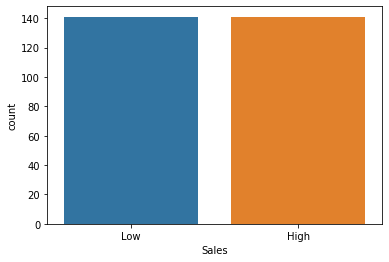

In [44]:
sns.countplot(y_train)

In [46]:
RF = RandomForestClassifier(n_jobs = 3, criterion = 'entropy', oob_score = True)

In [47]:
RF.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_jobs=3, oob_score=True)

In [48]:
RF.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=230790967),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=993815025),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=870220080),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=483797336),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=989198437),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2043362240),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=448483977),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1320040405),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
            

In [51]:
RF.n_classes_

2

In [52]:
RF.oob_score

True

In [53]:
predictions = RF.predict(x_test)

In [54]:
predictions

array(['Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'High', 'Low', 'High', 'High', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'High', 'High', 'High', 'Low', 'Low', 'High',
       'High', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'High',
       'Low', 'Low', 'High', 'Low', 'High', 'High', 'High', 'High', 'Low',
       'Low', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'High', 'Low',
       'Low', 'Low', 'High', 'High', 'High', 'High', 'Low', 'High',
       'High', 'High', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'Low',
       'Low', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'High', 'Low',
       'Low', 'Low', 'High', 'High'], dtype=ob

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

        High       0.76      0.89      0.82        53
         Low       0.90      0.78      0.83        67

    accuracy                           0.82       120
   macro avg       0.83      0.83      0.82       120
weighted avg       0.84      0.82      0.83       120



In [57]:
RF.score(x_test,y_test)

0.825

In [59]:
RF.score(x_train,y_train)

1.0

In [60]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x,y, test_size = 0.4)

<AxesSubplot:xlabel='Sales', ylabel='count'>

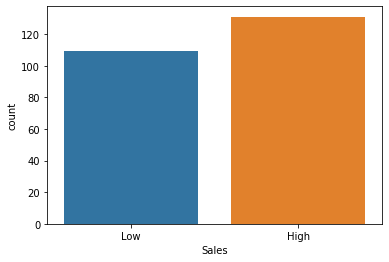

In [61]:
sns.countplot(y1_train)

In [62]:
RF = RandomForestClassifier(n_jobs = 4, criterion = 'entropy', oob_score = True)

In [65]:
RF.fit(x1_train,y1_train)

RandomForestClassifier(criterion='entropy', n_jobs=4, oob_score=True)

In [66]:
RF.score(x1_test,y1_test)

0.79375

In [67]:
RF.score(x1_train,y1_train)

1.0